<a href="https://colab.research.google.com/github/guinb0/Atividade4-Lista1-/blob/main/Projeto_Automacao_de_Processos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size: 24px">Automação de Indicadores</h1>

### O objetivo principal é automatizar o processo de envio dos One Pages para as lojas
### Descrição:

Imagine que trabalhamos como Analistas de Dados em uma rede nacional de lojas de roupas com 25 unidades distribuídas pelo Brasil.

Diariamente pela manhã, sua equipe calcula os One Pages, que são resumos concisos dos principais indicadores de cada loja.

Cada gerente de loja recebe por email o OnePage específico da sua unidade, além de um arquivo completo com todos os dados utilizados nos cálculos.

O One Page permite aos gerentes comparar o desempenho de diferentes lojas e identificar quais indicadores foram alcançados ou não no dia.

Seu papel envolve automatizar ao máximo esse processo, garantindo que os relatórios sejam enviados de forma eficiente e precisa todos os dias.



### Passo 1 - Importar Arquivos e Bibliotecas

---

In [ ]:

import pandas as pd
import os
import shutil
from google.colab import files
from datetime import datetime
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

In [ ]:


# carregando arquivos
emails = pd.read_excel('Emails.xlsx')
lojas = pd.read_csv('Lojas.csv', encoding='latin1', sep=';')
vendas = pd.read_excel('Vendas.xlsx')

# exibindo os dados para verificar se está tudo ok
display(emails)
display(lojas)
display(vendas)

,Loja,Gerente,E-mail
0,Iguatemi Esplanada,Helena,pythonimpressionador+helena@gmail.com
1,Shopping Midway Mall,Alice,pythonimpressionador+alice@gmail.com
2,Norte Shopping,Laura,pythonimpressionador+laura@gmail.com
3,Shopping Iguatemi Fortaleza,Manuela,pythonimpressionador+manuela@gmail.com
4,Shopping União de Osasco,Valentina,pythonimpressionador+valentina@gmail.com
5,Shopping Center Interlagos,Sophia,pythonimpressionador+sophia@gmail.com
6,Rio Mar Recife,Isabella,pythonimpressionador+isabella@gmail.com
7,Salvador Shopping,Heloisa,pythonimpressionador+heloisa@gmail.com
8,Rio Mar Shopping Fortaleza,Luiza,pythonimpressionador+luiza@gmail.com
9,Shopping Center Leste Aricanduva,Julia,pythonimpressionador+julia@gmail.com


,ID Loja,Loja
0,1,Iguatemi Esplanada
1,2,Shopping Midway Mall
2,3,Norte Shopping
3,4,Shopping Iguatemi Fortaleza
4,5,Shopping União de Osasco
5,6,Shopping Center Interlagos
6,7,Rio Mar Recife
7,8,Salvador Shopping
8,9,Rio Mar Shopping Fortaleza
9,10,Shopping Center Leste Aricanduva


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,1,Sapato Estampa,1,358,358
1,1,2019-01-01,1,Camiseta,2,180,360
2,1,2019-01-01,1,Sapato Xadrez,1,368,368
3,2,2019-01-02,3,Relógio,3,200,600
4,2,2019-01-02,3,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,17,Short Listrado,2,102,204
100995,69996,2019-12-26,17,Mochila,4,270,1080
100996,69996,2019-12-26,17,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,11,Camisa Listrado,1,108,108


### Passo 2 - Definir Criar uma Tabela para cada Loja

---

In [ ]:

vendas = vendas.merge(lojas, on='ID Loja') # incluindo nome da loja em vendas
display(vendas)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
0,1,2019-01-01,1,Sapato Estampa,1,358,358,Iguatemi Esplanada
1,1,2019-01-01,1,Camiseta,2,180,360,Iguatemi Esplanada
2,1,2019-01-01,1,Sapato Xadrez,1,368,368,Iguatemi Esplanada
3,21,2019-01-02,1,Camisa Gola V Listrado,2,116,232,Iguatemi Esplanada
4,34,2019-01-02,1,Sapato Listrado,1,363,363,Iguatemi Esplanada
...,...,...,...,...,...,...,...,...
100994,69846,2019-12-25,8,Short Estampa,2,96,192,Salvador Shopping
100995,69846,2019-12-25,8,Tênis Estampa,5,256,1280,Salvador Shopping
100996,69850,2019-12-25,8,Calça Estampa,4,177,708,Salvador Shopping
100997,69972,2019-12-26,8,Terno Liso,3,720,2160,Salvador Shopping


In [ ]:
# Criar dicionário de lojas
dicionario_lojas = {}
for loja in lojas['Loja']:
    dicionario_lojas[loja] = vendas.loc[vendas['Loja'] == loja, :]
display(dicionario_lojas['Rio Mar Recife'])
display(dicionario_lojas['Shopping Vila Velha'])

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
72551,46,2019-01-02,7,Camisa,1,100,100,Rio Mar Recife
72552,46,2019-01-02,7,Calça Liso,2,190,380,Rio Mar Recife
72553,46,2019-01-02,7,Cinto,1,200,200,Rio Mar Recife
72554,87,2019-01-02,7,Camisa Estampa,1,113,113,Rio Mar Recife
72555,109,2019-01-02,7,Camisa Gola V Listrado,3,116,348,Rio Mar Recife
...,...,...,...,...,...,...,...,...
76645,69905,2019-12-25,7,Mochila Listrado,2,275,550,Rio Mar Recife
76646,69905,2019-12-25,7,Camisa Xadrez,3,105,315,Rio Mar Recife
76647,69905,2019-12-25,7,Tênis Liso,3,266,798,Rio Mar Recife
76648,69954,2019-12-25,7,Chinelo,3,60,180,Rio Mar Recife


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
64268,32,2019-01-02,19,Polo Liso,1,137,137,Shopping Vila Velha
64269,32,2019-01-02,19,Polo Listrado,2,149,298,Shopping Vila Velha
64270,38,2019-01-02,19,Meia Xadrez,3,41,123,Shopping Vila Velha
64271,38,2019-01-02,19,Relógio,1,200,200,Shopping Vila Velha
64272,82,2019-01-02,19,Meia Listrado,1,37,37,Shopping Vila Velha
...,...,...,...,...,...,...,...,...
68497,69801,2019-12-25,19,Bermuda,3,150,450,Shopping Vila Velha
68498,69859,2019-12-25,19,Meia Liso,2,38,76,Shopping Vila Velha
68499,69970,2019-12-26,19,Casaco Linho,2,299,598,Shopping Vila Velha
68500,69974,2019-12-26,19,Meia Listrado,3,37,111,Shopping Vila Velha


### Passo 3 - Definir dia indicador

---

In [ ]:

dia_indicador = vendas['Data'].max() # -----:> Definindo data do indicador
print(dia_indicador)
print('{}/{}'.format(dia_indicador.day, dia_indicador.month))

2019-12-26 00:00:00
26/12


### Passo 4 - Salvar a planilha na pasta de backup

In [ ]:
# Pirmeiro, vamos verificar se a pasta já existe
caminho_backup = 'Backup_Arquivos_Lojas'
if not os.path.exists(caminho_backup):
    os.makedirs(caminho_backup)

lista_nomes_backup = os.listdir(caminho_backup)

for loja in dicionario_lojas:
    if loja not in lista_nomes_backup:
        nova_pasta = os.path.join(caminho_backup, loja)
        os.makedirs(nova_pasta)

    # Após a verificação, salvar na pasta
    nome_arquivo = '{}_{}_{}.xlsx'.format(dia_indicador.month, dia_indicador.day, loja)
    local_arquivo = os.path.join(caminho_backup, loja, nome_arquivo)
    dicionario_lojas[loja].to_excel(local_arquivo)

### Passo 5 - Definir Metas

---



In [ ]:

meta_faturamento_dia = 1000
meta_faturamento_ano = 1650000
meta_qtdeprodutos_dia = 4
meta_qtdeprodutos_ano = 120
meta_ticketmedio_dia = 500
meta_ticketmedio_ano = 500

print("Arquivos salvos na pasta 'Backup_Arquivos_Lojas'.")

Arquivos salvos na pasta 'Backup_Arquivos_Lojas'.


### Passo 6 - Calcular indicadores e enviar por e-mail para os respectivos gerentes
---


In [ ]:
# CONFIG SERVER GOOGLE
smtp_server = 'smtp.gmail.com'
smtp_port = 587
email_user = 'ggerente27@gmail.com'  # E-mail de teste
email_password = 'khiy isnv hhxs gtiv'  # Senha de app do goole

# enviando emails
for loja in dicionario_lojas:
    vendas_loja = dicionario_lojas[loja]
    vendas_loja_dia = vendas_loja.loc[vendas_loja['Data'] == dia_indicador, :]

    # somando o faturamento
    faturamento_ano = vendas_loja['Valor Final'].sum()
    faturamento_dia = vendas_loja_dia['Valor Final'].sum()

    # Diversidade de produtos
    qtde_produtos_ano = len(vendas_loja['Produto'].unique())
    qtde_produtos_dia = len(vendas_loja_dia['Produto'].unique())

    # Ticket médio
    valor_venda = vendas_loja.groupby('Código Venda').sum(numeric_only=True)
    ticket_medio_ano = valor_venda['Valor Final'].mean()
    valor_venda_dia = vendas_loja_dia.groupby('Código Venda').sum(numeric_only=True)
    ticket_medio_dia = valor_venda_dia['Valor Final'].mean()

    # adicionando cores aos indicadores
    cor_fat_dia = 'green' if faturamento_dia >= meta_faturamento_dia else 'red'
    cor_fat_ano = 'green' if faturamento_ano >= meta_faturamento_ano else 'red'
    cor_qtde_dia = 'green' if qtde_produtos_dia >= meta_qtdeprodutos_dia else 'red'
    cor_qtde_ano = 'green' if qtde_produtos_ano >= meta_qtdeprodutos_ano else 'red'
    cor_ticket_dia = 'green' if ticket_medio_dia >= meta_ticketmedio_dia else 'red'
    cor_ticket_ano = 'green' if ticket_medio_ano >= meta_ticketmedio_ano else 'red'

    # Criar e-mail
    nome = emails.loc[emails['Loja'] == loja, 'Gerente'].values[0]
    email_to = emails.loc[emails['Loja'] == loja, 'E-mail'].values[0]

    msg = MIMEMultipart()
    msg['From'] = email_user
    msg['To'] = email_to
    msg['Subject'] = f'OnePage Dia {dia_indicador.day}/{dia_indicador.month} - Loja {loja}'

    body = f'''
    <p>Bom dia, {nome}</p>

    <p>O resultado de ontem <strong>({dia_indicador.day}/{dia_indicador.month})</strong> da <strong>Loja {loja}</strong> foi:</p>

    <table border="1" style="border-collapse: collapse;">
      <tr>
        <th>Indicador</th>
        <th>Valor Dia</th>
        <th>Meta Dia</th>
        <th>Cenário Dia</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${faturamento_dia:.2f}</td>
        <td style="text-align: center">R${meta_faturamento_dia:.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{qtde_produtos_dia}</td>
        <td style="text-align: center">{meta_qtdeprodutos_dia}</td>
        <td style="text-align: center"><font color="{cor_qtde_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_medio_dia:.2f}</td>
        <td style="text-align: center">R${meta_ticketmedio_dia:.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_dia}">◙</font></td>
      </tr>
    </table>
    <br>
    <table border="1" style="border-collapse: collapse;">
      <tr>
        <th>Indicador</th>
        <th>Valor Ano</th>
        <th>Meta Ano</th>
        <th>Cenário Ano</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${faturamento_ano:.2f}</td>
        <td style="text-align: center">R${meta_faturamento_ano:.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{qtde_produtos_ano}</td>
        <td style="text-align: center">{meta_qtdeprodutos_ano}</td>
        <td style="text-align: center"><font color="{cor_qtde_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_medio_ano:.2f}</td>
        <td style="text-align: center">R${meta_ticketmedio_ano:.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_ano}">◙</font></td>
      </tr>
    </table>

    <p>Segue em anexo a planilha com todos os dados para mais detalhes.</p>

    <p>Qualquer dúvida estou à disposição.</p>
    <p>Atenciosamente, Guilherme</p>
    '''

    msg.attach(MIMEText(body, 'html'))

    # anexando arquivo
    attachment = local_arquivo
    with open(attachment, 'rb') as f:
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(f.read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', f'attachment; filename= {os.path.basename(attachment)}')
        msg.attach(part)

    # enviando
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()
        server.login(email_user, email_password)
        text = msg.as_string()
        server.sendmail(email_user, email_to, text)

    print(f'E-mail enviado para {email_to} com sucesso.')

print("E-mails enviados para todos os gerentes.")

E-mail enviado para pythonimpressionador+helena@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+alice@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+laura@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+manuela@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+valentina@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+sophia@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+isabella@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+heloisa@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+luiza@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+julia@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+lorena@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+livia@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+maria_luiza@gmail.com com sucesso.
E-mail enviado para pythonimpressionador+cecilia@gmail.com com sucesso

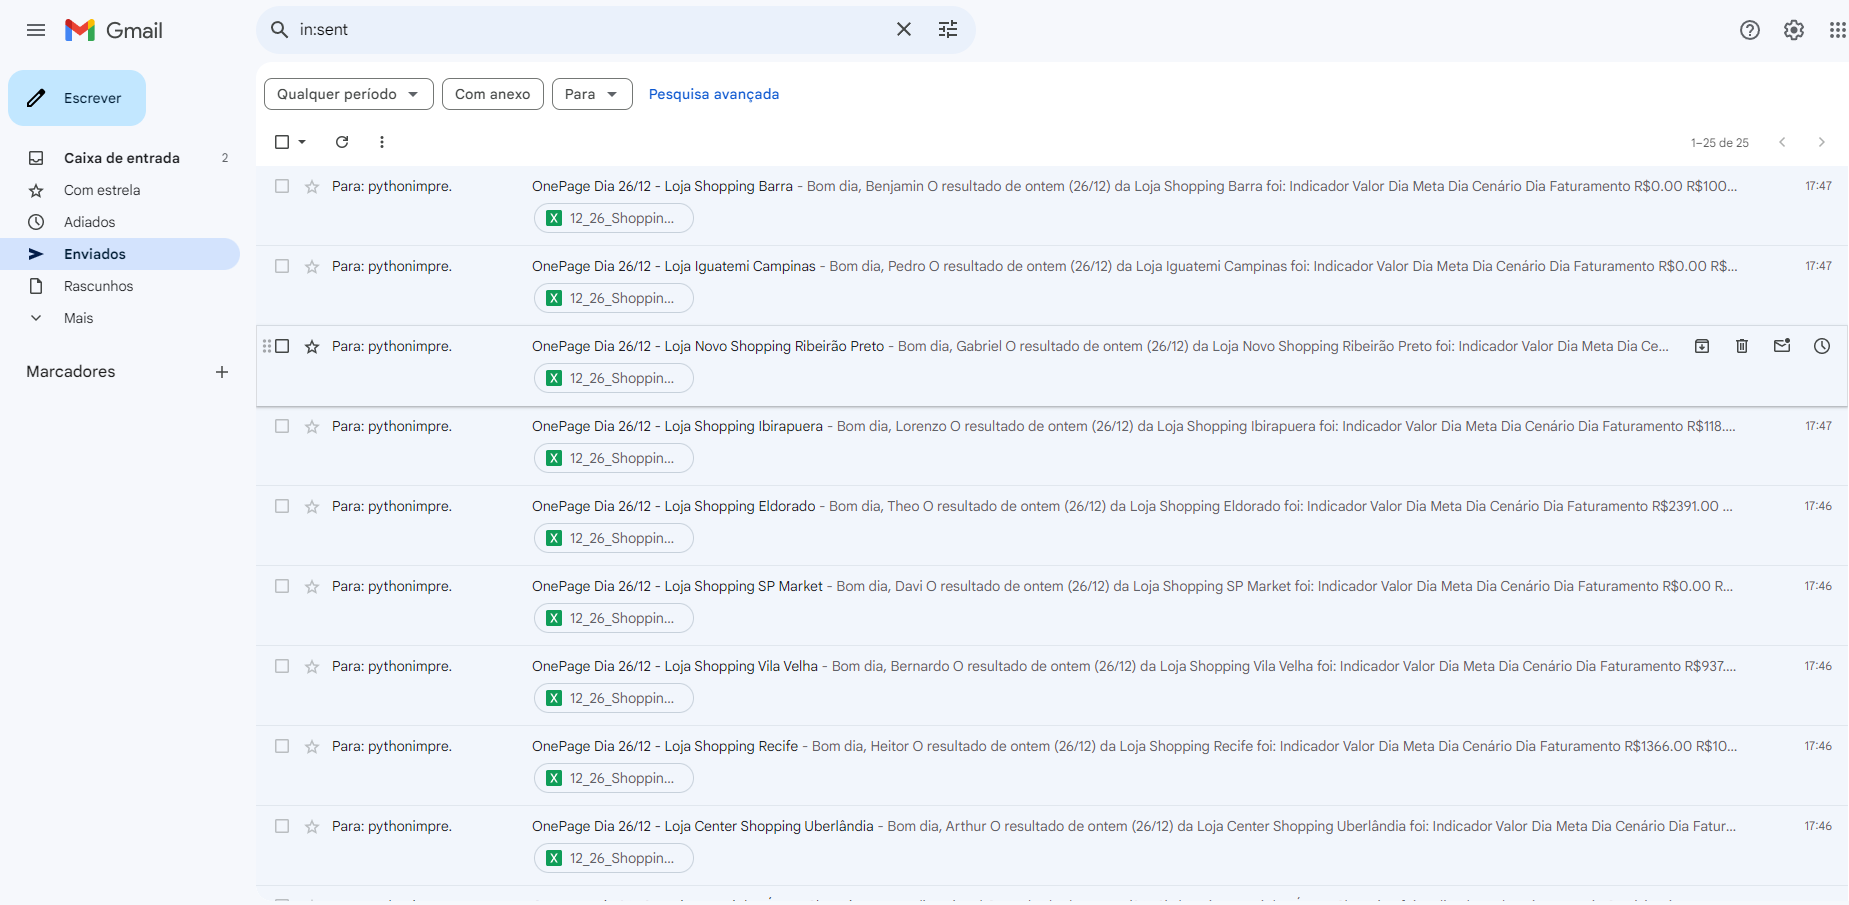

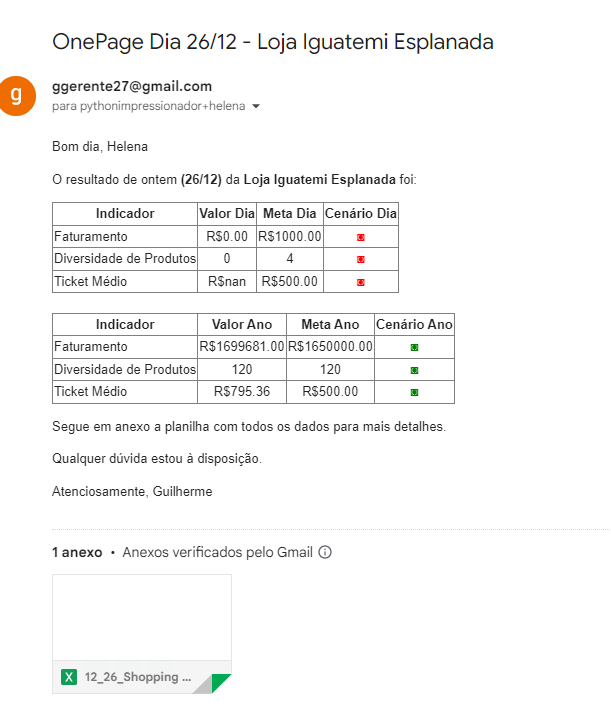

### Passo 7 - Criando ranking
---


In [ ]:
# 1- calculando faturamento anual
faturamento_lojas_ano = vendas.groupby('Loja')[['Loja', 'Valor Final']].sum().sort_values(by='Valor Final', ascending=False)
display(faturamento_lojas_ano)

# 2- colocando tudo no arquivo
nome_arquivo_anual = '{}_{}_Ranking Anual.xlsx'.format(dia_indicador.month, dia_indicador.day)
caminho_arquivo_anual = r'Backup Arquivos Lojas\{}'.format(nome_arquivo_anual)
faturamento_lojas_ano.to_excel(caminho_arquivo_anual)
print(f'Dados do faturamento anual salvos em "{caminho_arquivo_anual}".')

# 3- Filtrando pelo dia indicador
vendas_dia = vendas.loc[vendas['Data'] == dia_indicador]
faturamento_lojas_dia = vendas_dia.groupby('Loja')[['Loja', 'Valor Final']].sum().sort_values(by='Valor Final', ascending=False)
display(faturamento_lojas_dia)

# Salvando faturamento diario em outro excel
nome_arquivo_dia = '{}_{}_Ranking Dia.xlsx'.format(dia_indicador.month, dia_indicador.day)
caminho_arquivo_dia = r'Backup Arquivos Lojas\{}'.format(nome_arquivo_dia)
faturamento_lojas_dia.to_excel(caminho_arquivo_dia)
print(f'Dados do faturamento do dia salvos em "{caminho_arquivo_dia}".')

,Loja,Valor Final
Loja,,
Iguatemi Campinas,Iguatemi CampinasIguatemi CampinasIguatemi Cam...,1762419
Shopping Vila Velha,Shopping Vila VelhaShopping Vila VelhaShopping...,1731167
Bourbon Shopping SP,Bourbon Shopping SPBourbon Shopping SPBourbon ...,1726110
Rio Mar Recife,Rio Mar RecifeRio Mar RecifeRio Mar RecifeRio ...,1722766
Shopping SP Market,Shopping SP MarketShopping SP MarketShopping S...,1721763
Palladium Shopping Curitiba,Palladium Shopping CuritibaPalladium Shopping ...,1721120
Norte Shopping,Norte ShoppingNorte ShoppingNorte ShoppingNort...,1711968
Ribeirão Shopping,Ribeirão ShoppingRibeirão ShoppingRibeirão Sho...,1707122
Iguatemi Esplanada,Iguatemi EsplanadaIguatemi EsplanadaIguatemi E...,1699681


Dados do faturamento anual salvos em "Backup Arquivos Lojas\12_26_Ranking Anual.xlsx".


,Loja,Valor Final
Loja,,
Salvador Shopping,Salvador ShoppingSalvador Shopping,3950
Novo Shopping Ribeirão Preto,Novo Shopping Ribeirão PretoNovo Shopping Ribe...,3400
Center Shopping Uberlândia,Center Shopping UberlândiaCenter Shopping Uber...,2651
Shopping Eldorado,Shopping EldoradoShopping Eldorado,2391
Shopping Center Interlagos,Shopping Center InterlagosShopping Center Inte...,1582
Shopping Recife,Shopping RecifeShopping RecifeShopping Recife,1366
Norte Shopping,Norte ShoppingNorte Shopping,1259
Shopping União de Osasco,Shopping União de OsascoShopping União de Osas...,1207
Shopping Vila Velha,Shopping Vila VelhaShopping Vila VelhaShopping...,937


Dados do faturamento do dia salvos em "Backup Arquivos Lojas\12_26_Ranking Dia.xlsx".


### Passo 8 - Enviar e-mail para diretoria com o relatório anual

---

In [ ]:

#  enviar email com anexos
def enviar_email_com_anexo(email_user, email_password, email_receiver, subject, body, filename):
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587

    msg = MIMEMultipart()
    msg['From'] = email_user
    msg['To'] = email_receiver
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    # Anexando o arquivo
    attachment = MIMEBase('application', 'octet-stream')
    with open(filename, 'rb') as file:
        attachment.set_payload(file.read())
    encoders.encode_base64(attachment)
    attachment.add_header('Content-Disposition', f'attachment; filename={filename}')
    msg.attach(attachment)

    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(email_user, email_password)
        text = msg.as_string()
        server.sendmail(email_user, email_receiver, text)
        server.quit()
        print(f'E-mail com o arquivo {filename} enviado com sucesso para {email_receiver}')
    except Exception as e:
        print(f'Erro ao enviar e-mail: {str(e)}')




email_user = 'ggerente27@gmail.com'
email_password = 'khiy isnv hhxs gtiv'
email_receiver = 'guilhermefev04@gmail.com'  #troque pelo email da diretoria
subject = 'Backup do Ranking Anual das Lojas'
body = 'Segue em anexo o arquivo do ranking anual das lojas.'

# Enviar email com o anexo do ranking anual
enviar_email_com_anexo(email_user, email_password, email_receiver, subject, body, caminho_arquivo_anual)


E-mail com o arquivo Backup Arquivos Lojas\12_26_Ranking Anual.xlsx enviado com sucesso para guilhermefev04@gmail.com


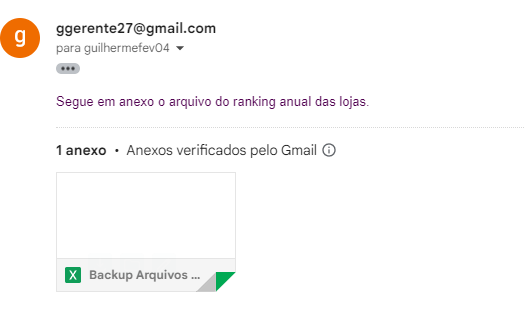